In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\02. Student_Performance_(Regression)\02. Student_Performance_(Regression)\data\cleaned.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [82]:
df.shape

(1000, 10)

In [83]:
numerical_columns=df.select_dtypes(exclude='object').columns.to_list()
numerical_columns

['math score', 'reading score', 'writing score', 'total score', 'average']

### Distribution of Numerical Features

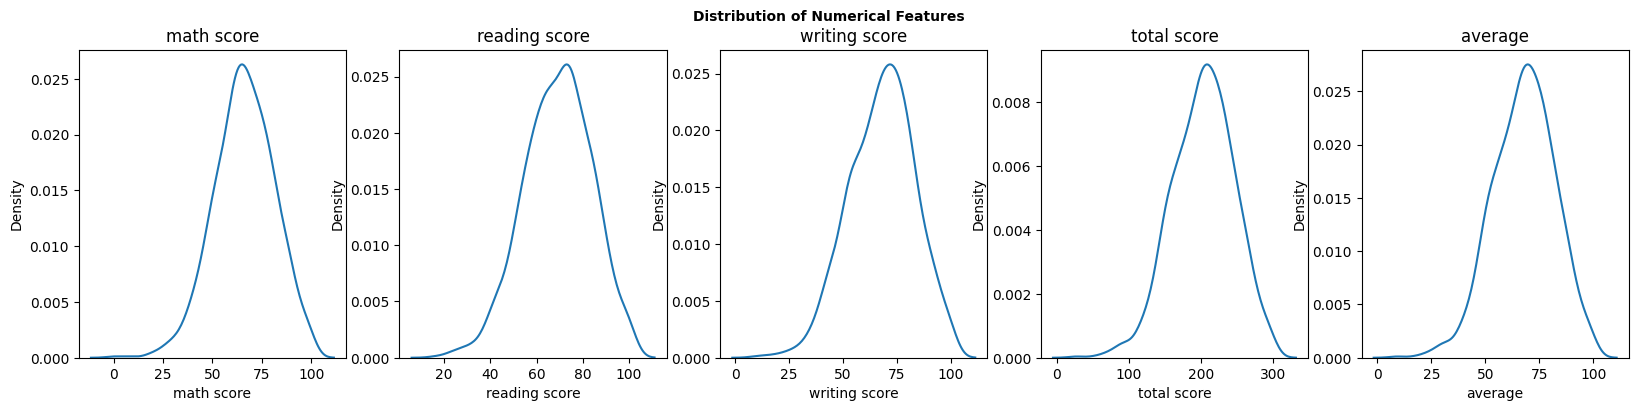

In [84]:
plt.figure(figsize=(20,4))
plt.suptitle('Distribution of Numerical Features',fontweight='bold',fontsize=10)
for index,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),index+1)
    plt.title(col)
    sns.kdeplot(data=df,x=col)

# 1.Boxplot

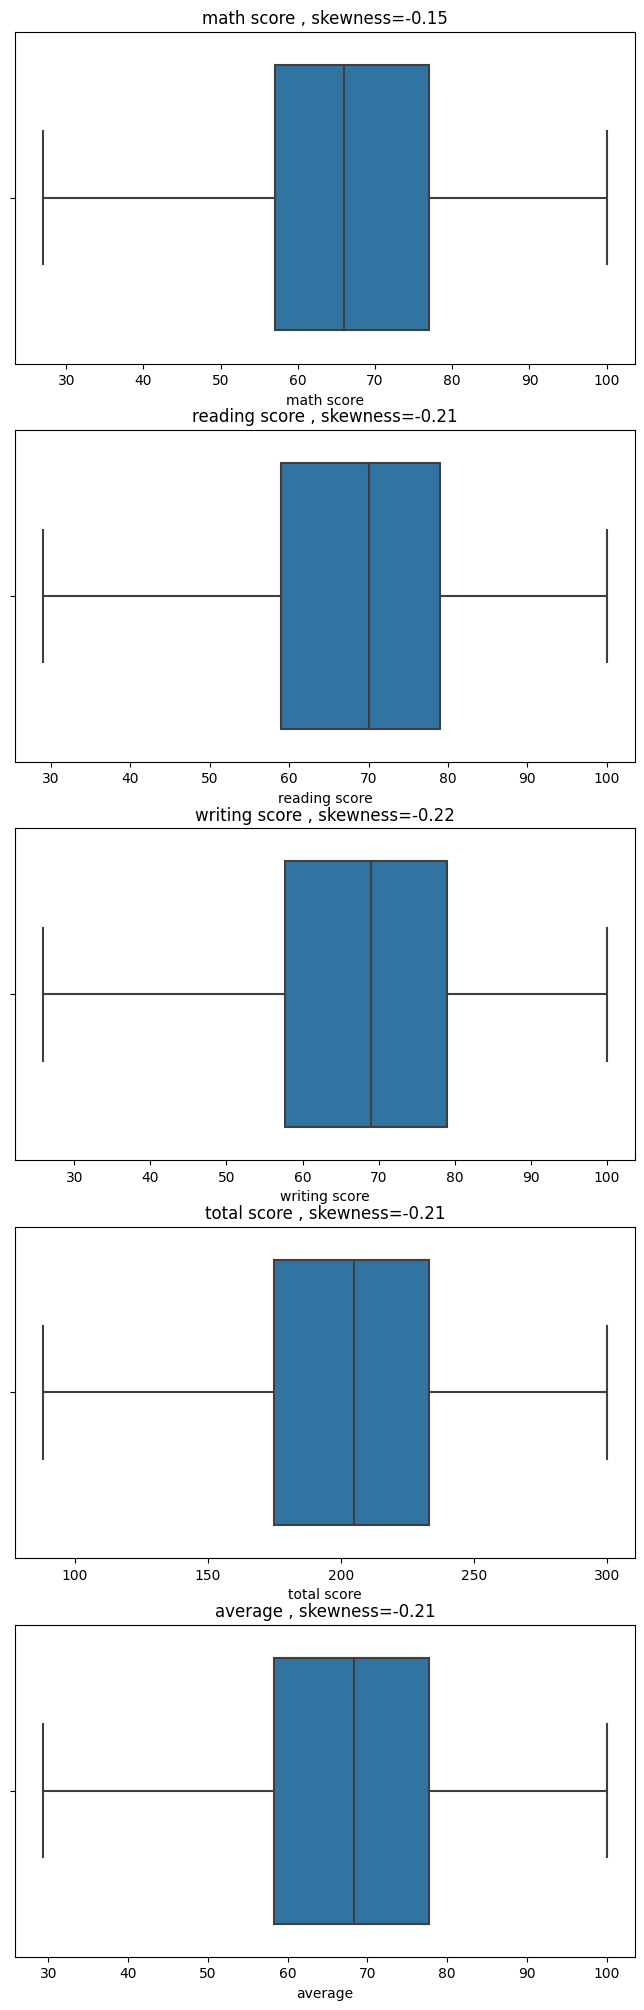

In [99]:
plt.figure(figsize=(8,25))
for index,col in enumerate(numerical_columns):
    plt.subplot(5,1,index+1)
    plt.title(f"{col} , skewness={df[col].skew():.2f}")
    sns.boxplot(data=df,x=col)
    

In [100]:
def count_of_outliers(df,col):
    
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.50)
    q3=df[col].quantile(0.75)
    q4=df[col].quantile(1)
    
    IQR=q3-q1
    
    lf=q1-(1.5*IQR)
    uf=q3+(1.5*IQR)
    
    if df[col].min() >=lf and df[col].max()<=uf:
        print(f'No outliers in {col}')
    else:
        x=df[df[col]<lf][col].count()
        y=df[df[col]>uf][col].count()
        print(f'count of outliers in {col}:{x+y}')
    
    

In [101]:
for col in numerical_columns:
    count_of_outliers(df,col)

No outliers in math score
No outliers in reading score
No outliers in writing score
No outliers in total score
No outliers in average


#### Note:
- Normal Distribution -> Z_score method
- Not Normal Distribution -> Box and Whisker plot


#### a) Trimming 
- remove outliers

In [102]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\02. Student_Performance_(Regression)\02. Student_Performance_(Regression)\data\cleaned.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [103]:
numerical_columns

['math score', 'reading score', 'writing score', 'total score', 'average']

In [104]:
def remove_outliers(df:pd.DataFrame,numerical_columns:list)->pd.DataFrame:

    for col in numerical_columns:
        q1=df[col].quantile(0.25)
        q2=df[col].quantile(0.50)
        q3=df[col].quantile(0.75)
        q4=df[col].quantile(1)
        
        IQR=q3-q1
        
        lf=q1-(1.5*IQR)    
        uf=q3+(1.5*IQR)
        
        df=df[(df[col]>lf) & (df[col]<uf)] # keep data which lie b/w lf and uf 
        
    return df

In [105]:
df=remove_outliers(df,numerical_columns)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       984 non-null    object 
 1   race/ethnicity               984 non-null    object 
 2   parental level of education  984 non-null    object 
 3   lunch                        984 non-null    object 
 4   test preparation course      984 non-null    object 
 5   math score                   984 non-null    int64  
 6   reading score                984 non-null    int64  
 7   writing score                984 non-null    int64  
 8   total score                  984 non-null    int64  
 9   average                      984 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 84.6+ KB


In [107]:
for col in numerical_columns:
    count_of_outliers(df,col)

No outliers in math score
No outliers in reading score
No outliers in writing score
No outliers in total score
No outliers in average


#### b) Capping
- Lower fence (Data which lie below lower fence is filled with minimum value)
- Upper fence (Data which lie above upper fence is filled with maximum value)

In [108]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\02. Student_Performance_(Regression)\02. Student_Performance_(Regression)\data\cleaned.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [109]:
numerical_columns

['math score', 'reading score', 'writing score', 'total score', 'average']

In [110]:
def capping_outliers(df:pd.DataFrame,columns:list)->pd.DataFrame:
    try:
        for col in columns:
            
            q1=df[col].quantile(0.25)
            q2=df[col].quantile(0.50)
            q3=df[col].quantile(0.75)
            q4=df[col].quantile(1)
            
            IQR=q3-q1
            
            lf=q1-(1.5*IQR)
            uf=q3+(1.5*IQR)
            
            df[col]=np.where(df[col]<lf,lf,df[col]) # data lies below lower limit is filled with lower limit value
            df[col]=np.where(df[col]>uf,uf,df[col]) # data lies above upper limit is filled with upper limit value
            
        return df
    except Exception as e:
            print(e)


In [111]:
df=capping_outliers(df,numerical_columns)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.333333


In [112]:
for col in numerical_columns:
    count_of_outliers(df,col)

No outliers in math score
No outliers in reading score
No outliers in writing score
No outliers in total score
No outliers in average


# 2. Z-Score method

#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score indicates an observation is below the mean.
- A positive Z-score indicates an observation is above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [164]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\02. Student_Performance_(Regression)\02. Student_Performance_(Regression)\data\cleaned.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [165]:
df['math score_z']=np.where(abs((df['math score']-df['math score'].mean())/df['math score'].std())>3,'outliers','Not Outliers')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,math score_z
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Not Outliers
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Not Outliers
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Not Outliers
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Not Outliers
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Not Outliers
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Not Outliers
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Not Outliers
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Not Outliers
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Not Outliers


In [166]:
df[['math score','math score_z']]

,math score,math score_z
0,72,Not Outliers
1,69,Not Outliers
2,90,Not Outliers
3,47,Not Outliers
4,76,Not Outliers
...,...,...
995,88,Not Outliers
996,62,Not Outliers
997,59,Not Outliers
998,68,Not Outliers


In [167]:
df['math score_z'].value_counts()

Not Outliers    996
outliers          4
Name: math score_z, dtype: int64

In [168]:
df[df['math score_z']=='outliers']['math score']

17     18
59      0
787    19
980     8
Name: math score, dtype: int64

In [169]:
IQR=df['math score'].quantile(0.75) - df['math score'].quantile(0.25)

In [170]:
lf=df['math score'].quantile(0.25)-(1.5*IQR)
uf=df['math score'].quantile(0.75)+(1.5*IQR)
lf,uf

(27.0, 107.0)

### reading score

In [171]:
df['reading score_z']=np.where(abs((df['reading score']-df['reading score'].mean())/(df['reading score'].std()))>3,'Outliers','Not Outliers')

In [172]:
df['reading score_z'].value_counts()

Not Outliers    996
Outliers          4
Name: reading score_z, dtype: int64

In [173]:
df[df['reading score_z']=='Outliers']['reading score']

59     17
327    23
596    24
980    24
Name: reading score, dtype: int64

In [174]:
df.describe()

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [175]:
IQR=df['reading score'].quantile(0.75)-df['reading score'].quantile(0.25)

In [176]:
lf=df['reading score'].quantile(0.25) -(1.5*IQR)
uf=df['reading score'].quantile(0.75)+(1.5*IQR)
lf,uf

(29.0, 109.0)

#### writing score

In [177]:
df['writing score_z']=np.where(abs((df['writing score']-df['writing score'].mean())/df['writing score'].std())>3,'Outliers','Not Outliers')

In [178]:
df['writing score_z'].value_counts()

Not Outliers    996
Outliers          4
Name: writing score_z, dtype: int64

In [179]:
df[df['writing score_z']=='Outliers']['writing score']

59     10
76     22
327    19
596    15
Name: writing score, dtype: int64

In [180]:
IQR=df['writing score'].quantile(0.75)-df['writing score'].quantile(0.25)

In [181]:
lf=df['writing score'].quantile(0.25)-(1.5*IQR)
uf=df['writing score'].quantile(0.75)+(1.5*IQR)
lf,uf

(25.875, 110.875)

##### Comparison of skewness

In [184]:
df[numerical_columns].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
total score     -0.299057
average         -0.299057
dtype: float64